In [1]:
from collections import namedtuple, Counter
from itertools import accumulate
import random
import math
import requests
from io import StringIO
from matplotlib import pyplot as plt

Phrase = namedtuple('Phrase', ['hans', 'pinyin', 'rank'])

In [2]:
DICT_URL = 'https://gist.githubusercontent.com/indiejoseph/eae09c673460aa0b56db/raw'
resp = requests.get(DICT_URL)

In [3]:
# 规整数据，并按词频排序
full_phrases = []
for line in StringIO(resp.text):
    if '\t' not in line:
        continue
    phrase, pinyin, rank = line.strip().split('\t')
    pinyin = ''.join(filter(lambda c: c.isalpha(), pinyin)).lower()
    rank = int(rank)
    full_phrases.append(Phrase(phrase, pinyin, rank))
full_phrases = sorted(full_phrases, key=lambda p: p.rank)
print(f"{len(full_phrases)} phrases loaded")

56064 phrases loaded


In [4]:
# 去除同音字
pinyins = set()
phrases = []
# for phrase in full_phrases[:15038]:
for phrase in full_phrases:
    if phrase.pinyin in pinyins:
        continue
    pinyins.add(phrase.pinyin)
    phrases.append(phrase)
print(f"{len(phrases)} phrases remaining")

41029 phrases remaining


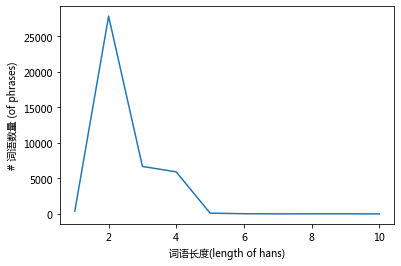

In [5]:
# 统计词语数量分布
# import matplotlib
# print(matplotlib.matplotlib_fname())
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #用来正常显示中文标签
hanlens = Counter(len(p.hans) for p in phrases)
x, y = zip(*sorted(hanlens.items()))
plt.xlabel('词语长度(length of hans)')
plt.ylabel('# 词语数量 (of phrases)')
plt.plot(x, y)
plt.show()

In [6]:
# 按字数长度筛选词语
phrases = [p for p in phrases if len(p.hans) == 2]
print(f"{len(phrases)} phrases remaining")

27851 phrases remaining


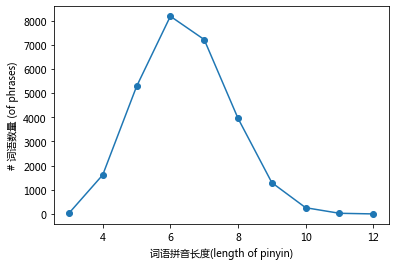

In [7]:
# 统计词语拼音长度分布
pylens = Counter(len(p.pinyin) for p in phrases)
x, y = zip(*sorted(pylens.items()))
plt.xlabel('词语拼音长度(length of pinyin)')
plt.ylabel('# 词语数量 (of phrases)')
plt.plot(x, y, marker='o')
plt.show()

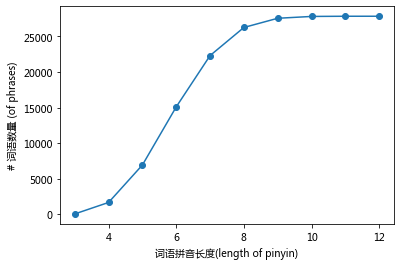

In [8]:
# 统计词语拼音增加每组长度的增长曲线
pylens = Counter(len(p.pinyin) for p in phrases)
x, y = zip(*sorted(pylens.items()))
y = list(accumulate(y))
plt.xlabel('词语拼音长度(length of pinyin)')
plt.ylabel('# 词语数量 (of phrases)')
plt.plot(x, y, marker='o')
plt.show()

In [9]:
# 按拼音长度筛选词语
phrases = [p for p in phrases if len(p.pinyin) <= 9]
phrases = sorted(phrases, key=lambda p: len(p.pinyin))
print(f"{len(phrases)} phrases remaining")

27565 phrases remaining


In [10]:
random.choices(phrases, k=4)

[Phrase(hans='发软', pinyin='faruan', rank=22266),
 Phrase(hans='轻身', pinyin='qingshen', rank=43489),
 Phrase(hans='歌词', pinyin='geci', rank=10225),
 Phrase(hans='污染', pinyin='wuran', rank=1616)]

In [11]:
# 统计字典信息熵
# e 字典的熵
e = math.log2(len(phrases)**4)
# n 每个符号所占用的二进制位的期望
n = math.log(2**e) / math.log(26 * 2 + 10 + 32)
print(f'字典信息熵(entropy) = {e:.2f} bits')
print(f'信息熵体积(entropy) = {n:.2f} chars')

字典信息熵(entropy) = 59.00 bits
信息熵体积(entropy) = 9.00 chars


In [12]:
with open('static/zh-cn', 'w', encoding='utf8') as f:
    for p in phrases:
        f.write(f'{p.pinyin}\t{p.hans}\n')